In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

basic_puts = pd.read_csv('data/basic_put_performance_test.csv')
basic_puts.columns = ['processId', 'opId', 'latency']

atomic = pd.read_csv('data/atomic_performance_test.csv')
atomic.columns = ['processId', 'opId', 'latency']


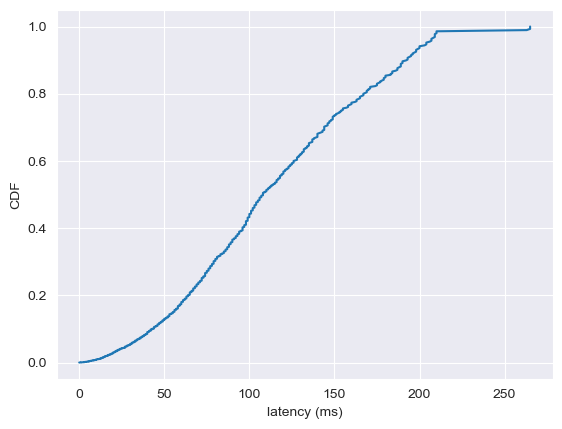

In [10]:
# Create a CDF plot of responseTime for atomic puts
# Sort the data
atomic = atomic.sort_values('latency')

# Create a new column with the cumulative sum of latencies
atomic['cdf'] = atomic['latency'].cumsum() / atomic['latency'].sum()

# Plot the cdf
plt.plot(atomic['latency'], atomic['cdf'])
plt.xlabel('latency (ms)')
plt.ylabel('CDF')
plt.show()

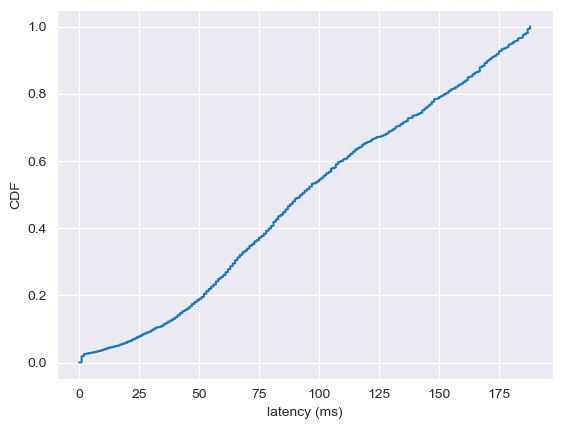

In [11]:
# Create a CDF plot of responseTime for basic puts
# Sort the data
basic_puts = basic_puts.sort_values('latency')
basic_puts = basic_puts.sort_values('latency')

# Create a new column with the cumulative sum of latencies
basic_puts['cdf'] = basic_puts['latency'].cumsum() / basic_puts['latency'].sum()

# Plot the cdf
plt.plot(basic_puts['latency'], basic_puts['cdf'])
plt.xlabel('latency (ms)')
plt.ylabel('CDF')
plt.show()

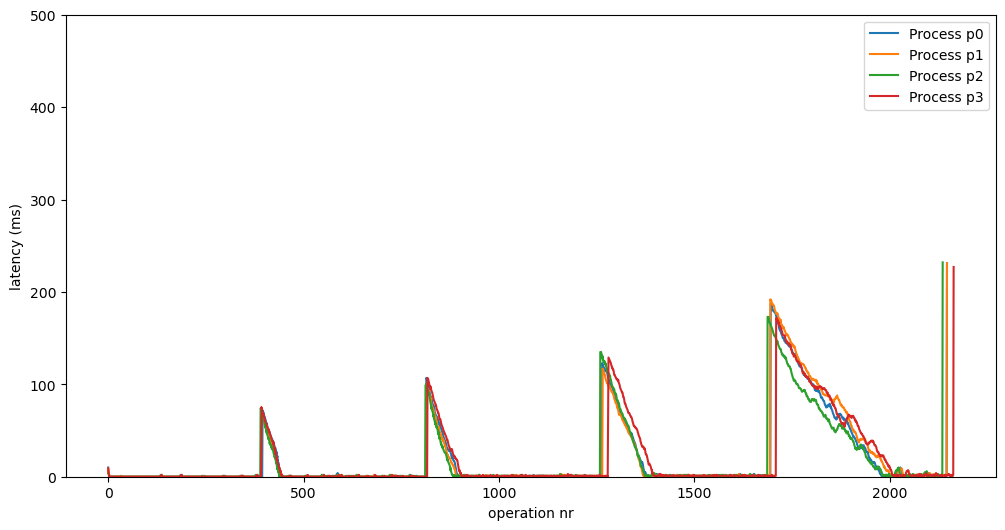

In [51]:
# Group by processId
grouped = basic_puts.groupby('processId')

# Visualize responseTime over opId for each processId
for name, group in grouped:
    plt.plot(group['opId'], group['latency'], label=f"Process {name}")

# Label axes
plt.xlabel('operation nr')
plt.ylabel('latency (ms)')

# Set y-axis max to 500
plt.ylim(0, 500)

# Set graph size
plt.gcf().set_size_inches(12, 6)
plt.legend()
plt.show()

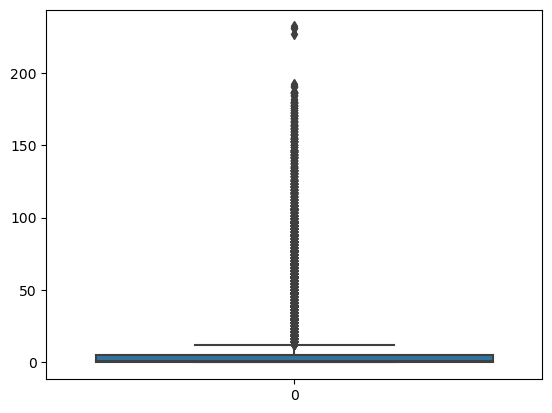

In [52]:
# Make a boxplot of responseTime
sns.boxplot(basic_puts['latency'])
plt.show()

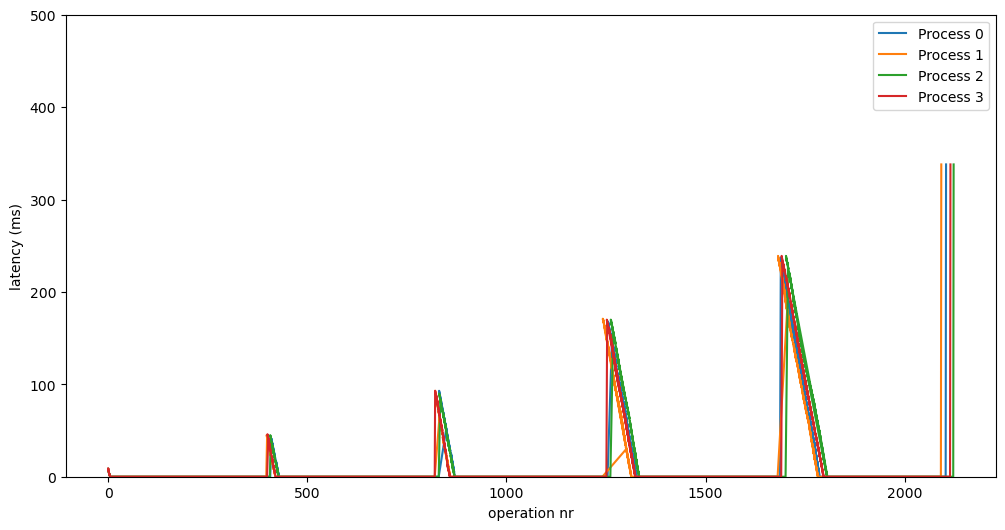

In [43]:
# Group by processId
grouped = atomic.groupby('processId')

# Visualize responseTime over opId for each processId
for name, group in grouped:
    plt.plot(group['opId'], group['latency'], label=f"Process {name}")

# Label axes
plt.xlabel('operation nr')
plt.ylabel('latency (ms)')

# Set y-axis max to 500
plt.ylim(0, 500)

# Set graph size
plt.gcf().set_size_inches(12, 6)
plt.legend()
plt.show()

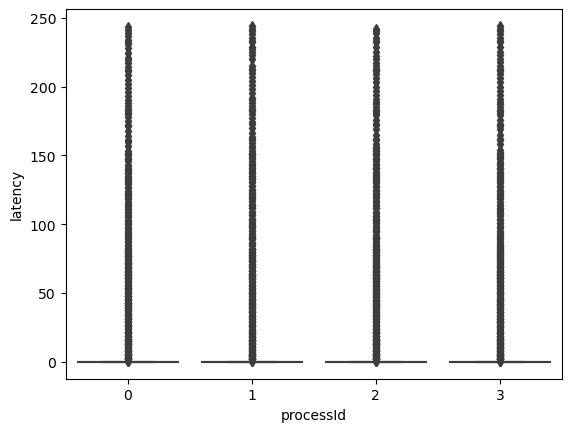

In [53]:
# Make a boxplot of responseTime for each processId
sns.boxplot(x='processId', y='latency', data=atomic)
plt.show()